In [1]:
!date

Fri Oct 23 11:14:31 PDT 2020


# Scatter plot of correlations

In [2]:
import numpy as np
import matplotlib.pyplot as plt


fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [3]:
tvm = np.array([
    0.7131064885731213,
    0.7154787587541469,
    0.7785335513369908,
    0.3473640662815317,
    0.7586328154128933,
    0.8459764527884021,
    0.8256909539006098,
    0.7685227092032973,
    0.7902950531989181,
    0.8603954969411375,
    0.8949754881600003,
    0.7481206616029706,
    0.5808847286185436,
    0.7776249214105116,
    0.7721401006775497,
    0.33836255547565286,
    0.8521015946040439])



    
svm = np.array([
    0.5602869626808273,
    0.6495524330063405,
    0.7820210105880154,
    0.43911275266985805,
    0.7657922121641035,
    0.8543240984197792,
    0.8090474914394583,
    0.8007171007330345,
    0.7291269019456826,
    0.879059877730467,
    0.8845680797822031,
    0.8626015726953518,
    0.6482292131005595,
    0.8409150024001599,
    0.8225616415890086,
    0.6902544944422973,
    0.7983531969836128])


labels = [
        'Astro',
        'Endo',
        'L2/3 IT',
        'L5 IT',
        'L5 PT',
        'L5/6 NP',
        'L6 CT',
        'L6 IT',
        'L6 IT Car3',
        'L6b',
        'Lamp5',
        'Pvalb',
        'SMC',
        'Sncg',
        'Sst',
        'VLMC',
        'Vip'
]

In [4]:
def yex(ax):
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

In [5]:
cluster_cmap = {
"Astro": (0.38823529411764707, 0.4745098039215686,  0.2235294117647059 ),  # 637939,
"Endo" : (0.5490196078431373,  0.6352941176470588,  0.3215686274509804 ),  # 8ca252,
"SMC"  : (0.7098039215686275,  0.8117647058823529,  0.4196078431372549 ),  # b5cf6b,
"VLMC" : (0.807843137254902,   0.8588235294117647,  0.611764705882353  ),  # cedb9c,
"Low Quality" : (0,0,0),
"L2/3 IT" : (0.9921568627450981,  0.6823529411764706,  0.4196078431372549  ),  # fdae6b
"L5 PT" : (0.9921568627450981,  0.8156862745098039,  0.6352941176470588  ),  # fdd0a2
"L5 IT" : (0.5176470588235295,  0.23529411764705882, 0.2235294117647059 ),  # 843c39
"L5/6 NP": "#D43F3A",
"L6 CT" : (0.8392156862745098,  0.3803921568627451,  0.4196078431372549 ),  # d6616b
"L6 IT" : (0.9058823529411765,  0.5882352941176471,  0.611764705882353  ),  # e7969c
"L6b" : (1.0,                 0.4980392156862745,  0.054901960784313725),  # ff7f0e
"L6 IT Car3" : (1.0,                 0.7333333333333333,  0.47058823529411764 ),  # ffbb78
"Lamp5" : (0.19215686274509805, 0.5098039215686274,  0.7411764705882353  ),  # 3182bd # blues
"Sncg" : (0.4196078431372549,  0.6823529411764706,  0.8392156862745098  ),  # 6baed6
"Vip" : (0.6196078431372549,  0.792156862745098,   0.8823529411764706  ),  # 9ecae1
"Sst" : (0.7764705882352941,  0.8588235294117647,  0.9372549019607843  ),  # c6dbef
"Pvalb":(0.7372549019607844,  0.7411764705882353,  0.8627450980392157  ),  # bcbddc
}

In [6]:
len(labels)

17

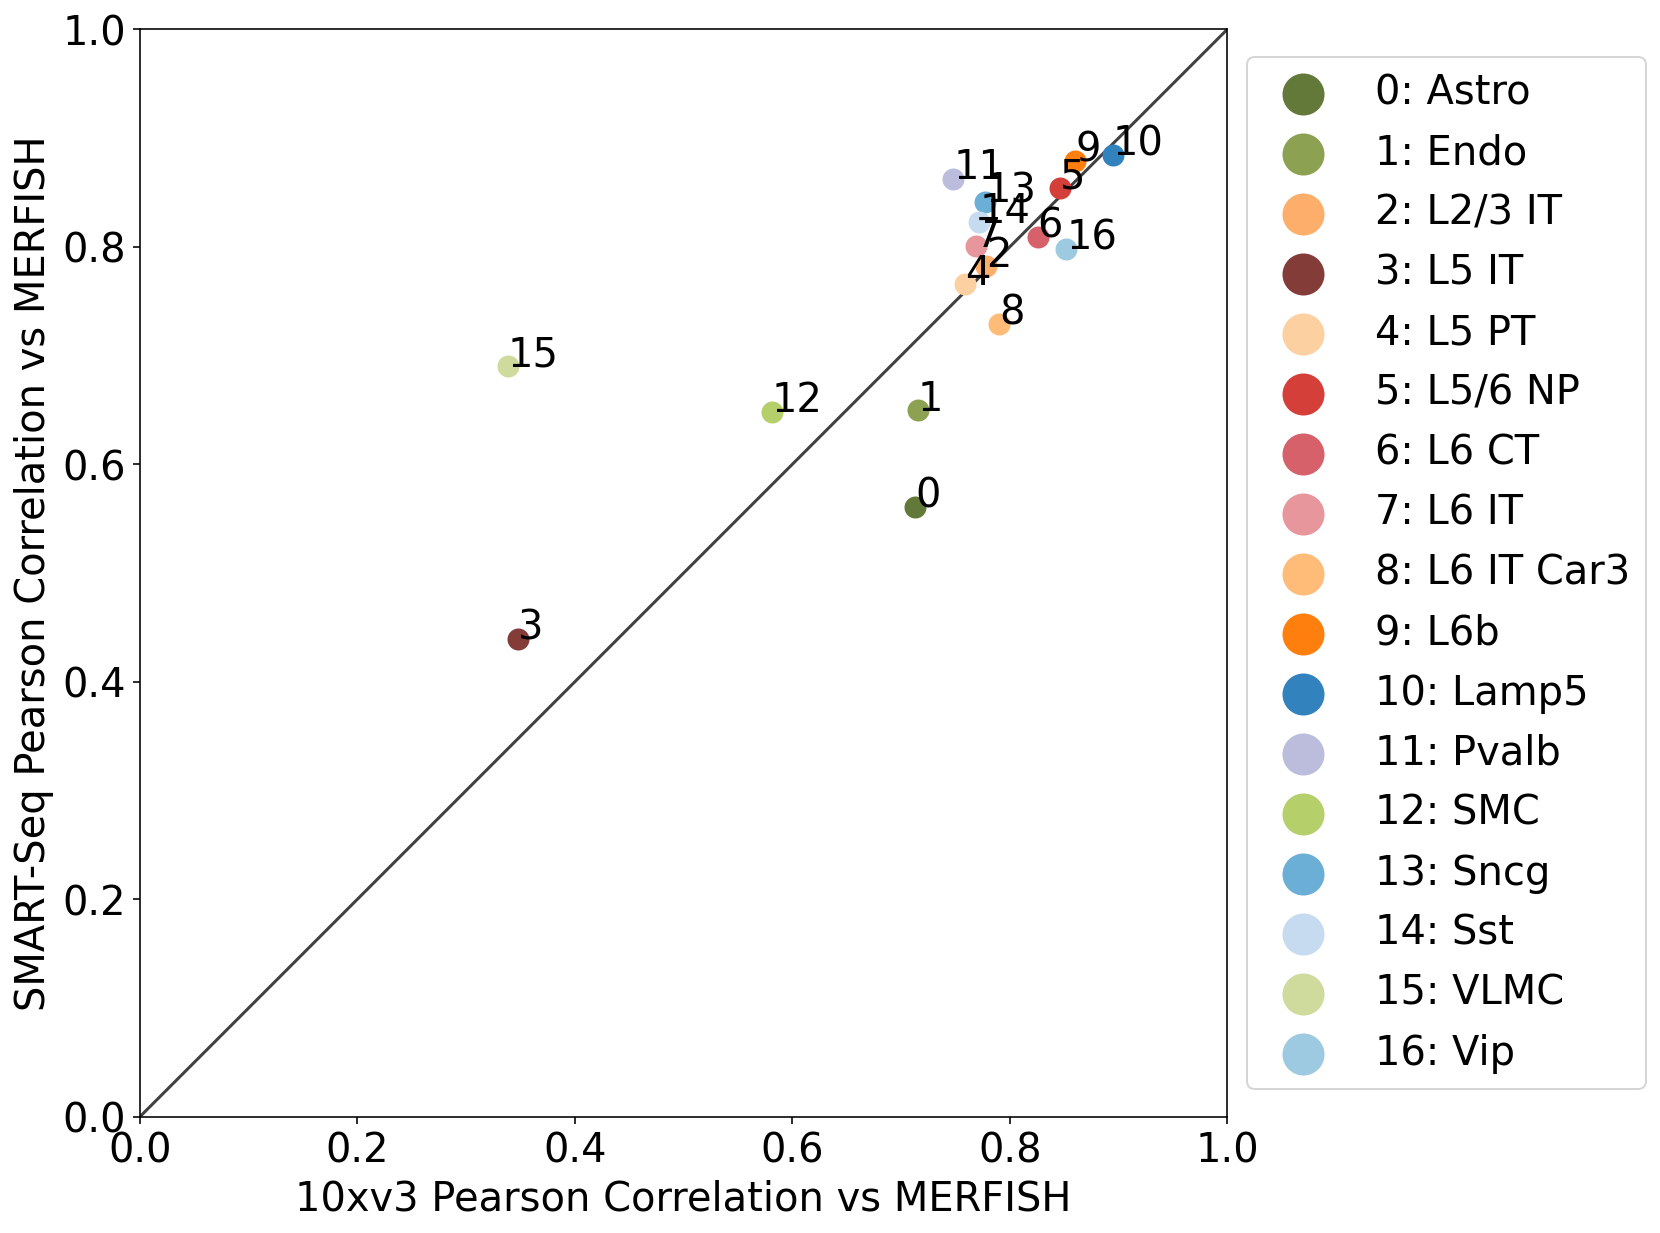

In [8]:
fig, ax = plt.subplots(figsize=(10,10))

x = tvm
y = svm

for lidx, l in enumerate(labels):
    ax.scatter(x[lidx], y[lidx], color=cluster_cmap[l], label="{}: {}".format(lidx, l), s=100)
    ax.annotate(lidx, xy=(x[lidx], y[lidx]))
ax.set_ylim(0,1)
yex(ax)

ax.set_xlabel("10xv3 Pearson Correlation vs MERFISH")
ax.set_ylabel("SMART-Seq Pearson Correlation vs MERFISH")


ax.legend(bbox_to_anchor=(1,0.5), loc="center left", markerscale=2)
plt.savefig("../../figures/merfish-updated_v_all_correlation.png", bbox_inches='tight',dpi=300)

plt.show()